In [396]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

## Crowdfunding

El *crowdfunding* es un mecanismo para financiar proyectos que consiste en juntar fondos a través de una gran cantidad de personas. Existen diversas formas en las cuales los participantes (o financistas) son compensados, desde un agradecimiento simbólico hasta la posibilidad de disfrutar de los frutos del proyecto. Plataformas online como Kickstarter, Indiegogo y Patreon, entre otras, han popularizado este fenómeno.

En este caso, trabajaremos con datos provenientes de Kickstarter. Esta plataforma usa un modelo de *all-or-nothing*, en donde el creador del proyecto fija una meta (en dinero) y un plazo para cumplirla. Si esta meta se cumple dentro del plazo, el proyecto se queda con el dinero (pagando una comisión a Kickstarter), de lo contrario los participantes o *backers* reciben su dinero de vuelta.

La pregunta que motiva este caso es: ¿Qué proyectos de crowdfunding son más exitosos?

## Base de datos

El archivo `kickstarter.csv` contiene datos de proyectos lanzados en Kickstarter, los cuales fueron recolectados durante el año 2018. Todos estos proyectos tuvieron al menos 50 backers y terminaron en alguno de los siguientes tres estados:

- **Exitoso (successful)**: se llegó la meta antes del plazo.
- **Fallido (failed)**: se cumplió el plazo y no se llegó a la meta.
- **Cancelado (canceled)**: por alguna razón la campaña fue cancelada.

La descripción de las variables en la base de datos es la siguiente:

## `kickstarter.csv`

## Objetivo

El objetivo de cada grupo es proponer qué tipo de campaña de crowdfunding sería conveniente lanzar, a partir de los datos.

Para ello, sigan los siguientes pasos:

1. **Describir la base de datos**. ¿cuántos proyectos hay en la base de datos? ¿qué tipo de variables hay en la base de datos (cuantitativas, cualitativas, ordinales, nominales, de razón, de intervalo)? ¿cómo se distribuyen los datos según las distintas variables? Utilice tablas y/o gráficos.
2. **Definir un criterio**, basado en los datos, para determinar qué hace que un proyecto sea bueno. ¿Cómo cambiaría este criterio si Kickstarter no utilizara el modelo *all-or-nothing*?
3. **Determine el tipo de proyecto para la campaña de crowdfunding que su grupo recomienda**, usando los criterios definidos anteriormente.

In [397]:
#CARGAMOS LA BASE DE DATOS
ks = pd.read_csv("https://github.com/rocarvaj/analitica-descriptiva/raw/main/datos/kickstarter/kickstarter.csv")
ks

,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real
0,1730140959,Beaconz - The App to Map Everything! (Canceled),Apps,Technology,GBP,canceled,5,GB,"8,127.2","92,424.3"
1,1689190720,Character Trait Endorsing Between Friends,Apps,Technology,USD,failed,3,US,35.0,"10,000.0"
2,1719536806,"Project Portal - People helping people, for fr...",Web,Technology,USD,failed,2,US,51.0,"1,500.0"
3,903714362,On the Record - Inside the World of Stenography,Documentary,Film & Video,USD,successful,9,US,"15,151.1","14,900.0"
4,166739996,"C Grayson Ponchos, ""Our Fashion is the ART""",Fashion,Fashion,USD,failed,8,US,211.0,"30,000.0"
...,...,...,...,...,...,...,...,...,...,...
95862,313363232,Contour Electric Blue Playing Cards,Playing Cards,Games,USD,successful,106,US,"2,975.0","2,500.0"
95863,1863949134,Clash of the Monsters - The Horror Genre Fight...,Video Games,Games,USD,successful,40,US,"1,722.0","1,000.0"
95864,1728934253,Dropship Custom LEGO Element Kit,Product Design,Design,USD,successful,67,US,"5,747.0","3,200.0"
95865,236314934,Show Dogs: Small business in the Great Lakes r...,Food Trucks,Food,USD,failed,1,US,3.0,"9,990.0"


##1. Describir la base de datos

¿Cuántos proyectos hay en la base de datos?

In [398]:
proyectos= ks['ID'].nunique()
print(f'La cantidad de proyectos según ID en la base de datos es de {proyectos}')

La cantidad de proyectos según ID en la base de datos es de 95867


In [399]:
proyectos_por_nombre= ks['name'].nunique()
print(f'La cantidad de proyectos según nombre en la base de datos es de {proyectos_por_nombre}. Lo que significa que existen proyectos con un ID diferente pero que comparten un mismo nombre (como se ve en la tabla a continuacion) por tanto, para saber el número de proyectos total se tomará en cuenta el dato de proyectos según ID.')

La cantidad de proyectos según nombre en la base de datos es de 95646. Lo que significa que existen proyectos con un ID diferente pero que comparten un mismo nombre (como se ve en la tabla a continuacion) por tanto, para saber el número de proyectos total se tomará en cuenta el dato de proyectos según ID.


In [400]:
proyectos_nombre=pd.pivot_table(ks, 
               index=["name"], 
               values="ID", 
               aggfunc="count").sort_values(by=["ID"],ascending=False)     
proyectos_nombre=proyectos_nombre.reset_index()
proyectos_nombre

,name,ID
0,n/a (Canceled),4
1,Death,3
2,Proof,3
3,Broken,3
4,Behind Closed Doors,3
...,...,...
95641,Gami : Any Size Duffle,1
95642,Gametime Scoreboard & Audio Player,1
95643,Gametee: The World's Finest Wallet for Videoga...,1
95644,Games of Thrones RPG With Online play,1


¿Qué tipo de variables hay en la base de datos(cuantitativas, cualitativas, ordinales, nomidales, de razón, de internvalo?

* **ID**: Variable cualitativa nominal, valores numéricos unicos que representan el identificador para cada proyecto.
* **name**: Variable cualitativa nominal, nombre del proyecto.
* **category**: Variable cualitativa nominal, describe la categoría especifica del proyecto o subcategoría.
* **main_category**: Variable cualitativa nominal, describe la categoria global o principal del proyecto.
* **currency**: Variable cualitativa nominal, es la Moneda en la que los fondos fueron recolectados 
* **state**: Variable cualitativa nominal, estado de proyecto.
* **backers**:Variable cuantitativa de razón, es el número de backers o participantes del proyecto.
* **country**: Variable cualitativa nominal, país del proyecto.
* **usd_pledged_real**: Variable cuantitativa de razón, Monto total reunido en USD.
* **usd_goal_real**: Variable cuantitativa de razón, Meta en USD de la campaña.

¿Cómo se distribuyen los datos según las distintas variables? Utilice tablas y/o gráficos.

**Gráfico variable "main_category"**
> Cantidad de proyectos para las 15 categorias globales

> En la siguiente tabla también se puede ver la cantidad de proyectos que hay en cada subcategoría.



In [401]:
numero_maincategory= ks["main_category"].nunique()
print(f'La cantidad de categorías principales son: {numero_maincategory}')

La cantidad de categorías principales son: 15


In [402]:
proyectos_maincategory= pd.pivot_table(ks, 
               index=["main_category"], 
               values="ID", 
               aggfunc="count").sort_values(by=["ID"],ascending=False) 
proyectos_maincategory=proyectos_maincategory.reset_index()
proyectos_maincategory['porcentaje %']= ((proyectos_maincategory["ID"]/95867)*100).astype(float).round(2)
proyectos_maincategory

,main_category,ID,porcentaje %
0,Film & Video,15930,16.6
1,Music,12852,13.4
2,Publishing,9703,10.1
3,Games,9695,10.1
4,Design,8294,8.7
5,Technology,7939,8.3
6,Art,7122,7.4
7,Food,6019,6.3
8,Fashion,5517,5.8
9,Comics,3074,3.2


In [403]:
fig_proyectos_maincategory = px.bar(proyectos_maincategory,
            x = 'main_category',
            y = 'ID',
            title= 'Cantidad de proyectos para las 15 categorias globales',
            text_auto = True)
fig_proyectos_maincategory = fig_proyectos_maincategory.update_xaxes(categoryorder = 'total descending')
fig_proyectos_maincategory

**Gráfico variable "category"**
> 1. Cantidad de proyectos para las categorias especificas dentro de las 15 categorias globales

> 2. Mayor cantidad de proyectos de cada categoria especifica para cada categoría global.

In [404]:
numero_category= ks["category"].nunique()
print(f'La cantidad de categorías específicas son: {numero_category}')

La cantidad de categorías específicas son: 159


In [405]:
#Cantidad de subcategorias en cada categoria principal
ks.groupby('main_category')['category'].nunique().sort_values(ascending=False)

main_category
Film & Video    20
Music           19
Publishing      18
Technology      16
Crafts          15
Art             13
Food            13
Fashion          9
Games            8
Theater          8
Design           7
Photography      7
Comics           6
Journalism       6
Dance            5
Name: category, dtype: int64

In [406]:
#1 Cantidad de proyectos para las 159 categorias especificas dentro de las 15 categorias globales
proyectos_categoria=pd.pivot_table(ks, 
               index=["main_category","category"], 
               values="ID", 
               aggfunc="count")
proyectos_categoria=proyectos_categoria.reset_index()
proyectos_categoria

,main_category,category,ID
0,Art,Art,2099
1,Art,Ceramics,71
2,Art,Conceptual Art,260
3,Art,Digital Art,315
4,Art,Illustration,852
...,...,...,...
165,Theater,Immersive,83
166,Theater,Musical,236
167,Theater,Plays,370
168,Theater,Spaces,61


In [407]:
fig_proyectos_categoria = px.bar(proyectos_categoria,
            x = 'category',
            y = 'ID',
            color = 'main_category',
            title='Cantidad de proyectos para las categorias especificas dentro de las categorias globales',
            text_auto = True)
fig_proyectos_categoria

In [408]:
ks.groupby('category')['main_category'].nunique().sort_values(ascending = False).head(10)

category
Comedy          4
Spaces          3
Letterpress     2
Web             2
Experimental    2
Festivals       2
Events          2
Anthologies     2
Mobile Games    1
Print           1
Name: main_category, dtype: int64

Con este ultimo codigo podemos ver que las subcategorias que se repiten dentro de las categorias principales son:"Comedy", "Spaces", "Letterpress","Web", "Experimental", "Festivals", "Events" y
 "Anthologies"  




In [409]:
#2 Mayor cantidad de proyectos de cada categoria especifica para cada categoría global.
max_category = proyectos_maincategory.groupby('main_category')['ID'].max()

In [410]:
proyectos_categoria = proyectos_categoria.merge(max_category, on='main_category')


In [411]:
proyectos_categoria.rename(columns = {'ID_x':'ID_category', 'ID_y':'ID_max'}, inplace = True)

In [412]:
proyectos_categoria['ID_Rel'] = proyectos_categoria['ID_category'] / proyectos_categoria['ID_max']
proyectos_categoria

,main_category,category,ID_category,ID_max,ID_Rel
0,Art,Art,2099,7122,0.3
1,Art,Ceramics,71,7122,0.0
2,Art,Conceptual Art,260,7122,0.0
3,Art,Digital Art,315,7122,0.0
4,Art,Illustration,852,7122,0.1
...,...,...,...,...,...
165,Theater,Immersive,83,2964,0.0
166,Theater,Musical,236,2964,0.1
167,Theater,Plays,370,2964,0.1
168,Theater,Spaces,61,2964,0.0


In [413]:
max_category_ = proyectos_categoria.groupby('main_category')['ID_Rel'].idxmax()
max_category_

main_category
Art               0
Comics           15
Crafts           20
Dance            34
Design           44
Fashion          50
Film & Video     58
Food             82
Games            94
Journalism       97
Music           115
Photography     126
Publishing      134
Technology      159
Theater         169
Name: ID_Rel, dtype: int64

In [414]:
proyectos_categoria= proyectos_categoria.loc[max_category_, ['main_category', 'category', 'ID_category','ID_max', 'ID_Rel']]
proyectos_categoria

,main_category,category,ID_category,ID_max,ID_Rel
0,Art,Art,2099,7122,0.3
15,Comics,Comics,1447,3074,0.5
20,Crafts,Crafts,1130,2087,0.5
34,Dance,Dance,636,996,0.6
44,Design,Product Design,6200,8294,0.7
50,Fashion,Fashion,2176,5517,0.4
58,Film & Video,Documentary,4185,15930,0.3
82,Food,Food,2921,6019,0.5
94,Games,Tabletop Games,4079,9695,0.4
97,Journalism,Journalism,434,1056,0.4


In [415]:
proyectos_categoria['ID%']=(proyectos_categoria["ID_Rel"]*100).astype(float).round(2)
proyectos_categoria.sort_values(by="ID_max", ascending=False)

,main_category,category,ID_category,ID_max,ID_Rel,ID%
58,Film & Video,Documentary,4185,15930,0.3,26.3
115,Music,Music,3449,12852,0.3,26.8
134,Publishing,Fiction,2197,9703,0.2,22.6
94,Games,Tabletop Games,4079,9695,0.4,42.1
44,Design,Product Design,6200,8294,0.7,74.8
159,Technology,Technology,1757,7939,0.2,22.1
0,Art,Art,2099,7122,0.3,29.5
82,Food,Food,2921,6019,0.5,48.5
50,Fashion,Fashion,2176,5517,0.4,39.4
15,Comics,Comics,1447,3074,0.5,47.1


In [416]:
fig_proyectos_categoria_max = px.bar(proyectos_categoria,
            x = 'category',
            y = 'ID_Rel',
            color = 'main_category',
            title='Subcategoría con la mayor cantidad de proyectos para cada categoría principal',
            text_auto = True)
fig_proyectos_categoria_max=fig_proyectos_categoria_max.update_xaxes(categoryorder = 'total descending')
fig_proyectos_categoria_max=fig_proyectos_categoria_max.update_layout(yaxis_tickformat = '.2%')
fig_proyectos_categoria_max

**Gráfico variable "country"**
> Distribución de los proyectos por país



In [417]:
proyectos_pais= pd.pivot_table(ks, 
               index=["country"], 
               values="ID", 
               aggfunc="count")
proyectos_pais=proyectos_pais.reset_index()
proyectos_pais

,country,ID
0,AT,140
1,AU,1793
2,BE,149
3,CA,3589
4,CH,192
5,DE,1042
6,DK,272
7,ES,503
8,FR,756
9,GB,8534


In [418]:
fig_proyectos_pais = px.bar(proyectos_pais,
            x = 'country',
            y = 'ID',
            title='Cantidad de proyectos por país',
            text_auto = True)
fig_proyectos_pais = fig_proyectos_pais.update_xaxes(categoryorder = 'total descending')
fig_proyectos_pais

**Gráfico variable "currency"**


> Cantidad de proyectos por moneda



In [419]:
proyectos_moneda= pd.pivot_table(ks, 
               index=["currency"], 
               values="ID", 
               aggfunc="count")
proyectos_moneda=proyectos_moneda.reset_index()
proyectos_moneda

,currency,ID
0,AUD,1793
1,CAD,3589
2,CHF,192
3,DKK,272
4,EUR,4076
5,GBP,8534
6,HKD,160
7,JPY,11
8,MXN,394
9,NOK,175


In [420]:
fig_proyectos_moneda= px.bar(proyectos_moneda,
       x = 'currency',
       y = 'ID',
       title='Cantidad de proyectos por moneda',
       text_auto = True)
fig_proyectos_moneda = fig_proyectos_moneda.update_xaxes(categoryorder = 'total descending')
fig_proyectos_moneda

**Gráfico variable "state"**


> 1. Cantidad de proyectos según su estado.

> 2. Cantidad de proyectos en cada estado para cada categoría global.





In [421]:
#1. Cantidad de proyectos según su estado
proyectos_estado= pd.pivot_table(ks, 
               index=["state"], 
               values="ID", 
               aggfunc="count")
proyectos_estado=proyectos_estado.reset_index()
proyectos_estado

,state,ID
0,canceled,7876
1,failed,47875
2,successful,40116


In [422]:
fig_proyectos_estado = px.bar(proyectos_estado,
            x = 'state',
            y = 'ID',
            title='Cantidad de proyectos según su estado',
            text_auto = True)
fig_proyectos_estado = fig_proyectos_estado.update_xaxes(categoryorder = 'total descending')
fig_proyectos_estado

In [423]:
#2 cantidad de proyectos en cada estado para cada categoría global
proyectos_estado_category= pd.pivot_table(ks, 
               index=["main_category","state"], 
               values="ID", 
               aggfunc="count")
proyectos_estado_category=proyectos_estado_category.reset_index()
proyectos_estado_category

,main_category,state,ID
0,Art,canceled,382
1,Art,failed,3312
2,Art,successful,3428
3,Comics,canceled,191
4,Comics,failed,1118
5,Comics,successful,1765
6,Crafts,canceled,147
7,Crafts,failed,1286
8,Crafts,successful,654
9,Dance,canceled,30


In [424]:
fig_proyectos_estado_category = px.bar(proyectos_estado_category,
            x = 'main_category',
            y = 'ID',
            color = 'state',
            title='Cantidad de proyectos en cada estado para cada categoría global',
            text_auto = True)
fig_proyectos_estado_category

In [425]:
fig_proyectos_estado_category_2 = px.histogram(proyectos_estado_category,
            x = 'main_category',
            y = 'ID',
            color = 'state',
            barnorm='fraction',
            title='Cantidad de proyectos en cada estado para cada categoría global',
            text_auto = True)
fig_proyectos_estado_category_2

**Gráfico variable "backers"**


> 1. Cantidad total de participantes en cada categoría global o principal.


> 2. Mayor cantidad de participantes en un proyecto de cada categoría global o principal





In [426]:
suma_participantes= ks['backers'].sum()
suma_participantes


11537465

In [427]:
#1 Cantidad total de participantes en cada categoría global o principal.
participantes = pd.pivot_table(ks, 
               index=["main_category", "state"],
               values="backers", 
               aggfunc="sum").sort_values(by= "backers", ascending = False)

participantes = participantes.reset_index()
participantes

#se puede ver la cantidad de participantes que hay en cada categoría especifica. 

,main_category,state,backers
0,Games,successful,2807499
1,Design,successful,1806674
2,Technology,successful,1472884
3,Film & Video,successful,1119708
4,Music,successful,737950
5,Publishing,successful,592464
6,Fashion,successful,384178
7,Comics,successful,373589
8,Food,successful,300596
9,Art,successful,287138


In [428]:
participantes_1 = pd.pivot_table(ks, 
               index="main_category",
               values="backers", 
               aggfunc="sum").sort_values(by= "backers", ascending = False)

participantes_1 = participantes_1.reset_index()
participantes_1

,main_category,backers
0,Games,3131197
1,Design,2013237
2,Technology,1643122
3,Film & Video,1298521
4,Music,807622
5,Publishing,671489
6,Fashion,436374
7,Comics,402623
8,Food,365814
9,Art,328606


In [429]:
graf_cant_participantes = px.histogram(participantes,
            x = "main_category",
            y = "backers",
            title='Cantidad total de participantes en cada categoría global o principal',
            text_auto = True)
graf_cant_participantes = graf_cant_participantes.update_xaxes(categoryorder = 'total descending')
graf_cant_participantes

In [430]:
graf_cant_participantes = px.histogram(participantes,
            x = "main_category",
            y = "backers",
            color = "state",
            barnorm = "percent",
            title='Cantidad total de participantes en cada estado y categoría global o principal',
            text_auto = True)
graf_cant_participantes = graf_cant_participantes.update_xaxes(categoryorder = 'total descending')
graf_cant_participantes

In [431]:
#2 Mayor cantidad de participantes en un proyecto de cada categoría global o principal
max_participantes = ks.groupby('main_category')['backers'].idxmax()

In [432]:
participantes_max = ks.loc[max_participantes, ['main_category', 'backers']]
participantes_max.sort_values(by= "backers", ascending = False)

,main_category,backers
70316,Technology,105857
67718,Film & Video,91585
66996,Games,73206
41875,Design,44949
57876,Publishing,21808
30657,Fashion,13642
66548,Crafts,12705
12168,Music,10768
81044,Food,9293
84768,Comics,6466


In [433]:
fig_max_participantes = px.bar(participantes_max,
            x = 'main_category',
            y = 'backers',
            title='Mayor cantidad de participantes en un proyecto de cada categoría global o principal',
            text_auto = True)
fig_max_participantes=fig_max_participantes.update_xaxes(categoryorder = 'total descending')
fig_max_participantes

**Gráfico variable "usd_pledged_real"**

In [471]:
pd.pivot_table(ks, 
               index=["state"],
               values="usd_pledged_real", 
               aggfunc=["sum","mean", "median"])

,sum,mean,median
,usd_pledged_real,usd_pledged_real,usd_pledged_real
state,,,
canceled,"28,367,294.6","3,601.7",380.0
failed,"78,674,960.9","1,643.3",205.8
successful,"888,790,063.5","22,155.5","5,133.1"


In [434]:
montoganado_proyecto = pd.pivot_table(ks, 
               index=["main_category", "category", "state"],
               values="usd_pledged_real", 
               aggfunc="sum")
 
montoganado_proyecto = montoganado_proyecto.reset_index()
montoganado_proyecto

,main_category,category,state,usd_pledged_real
0,Art,Art,canceled,"68,353.4"
1,Art,Art,failed,"887,481.3"
2,Art,Art,successful,"8,141,626.0"
3,Art,Ceramics,canceled,470.1
4,Art,Ceramics,failed,"24,085.0"
...,...,...,...,...
498,Theater,Spaces,failed,"26,848.4"
499,Theater,Spaces,successful,"584,778.4"
500,Theater,Theater,canceled,"81,908.6"
501,Theater,Theater,failed,"740,947.3"


In [435]:
graf_montoporproyecto = px.histogram(montoganado_proyecto,
            x = "main_category",
            y = "usd_pledged_real",
            color = "state",
            barnorm = "percent",
            text_auto = True)
graf_montoporproyecto = graf_montoporproyecto.update_xaxes(categoryorder = 'total descending')
graf_montoporproyecto

In [436]:
# subcategorias con más dinero recaudado para cada categoría principal.
montoganado_proyectomax = montoganado_proyecto.groupby('main_category')['usd_pledged_real'].idxmax()

In [437]:
montoganado_proyectomax2= montoganado_proyecto.loc[montoganado_proyectomax, ['main_category', 'category', 'state','usd_pledged_real']]
montoganado_proyectomax2

,main_category,category,state,usd_pledged_real
2,Art,Art,successful,"8,141,626.0"
47,Comics,Comics,successful,"7,588,076.4"
62,Crafts,Crafts,successful,"2,439,923.6"
103,Dance,Dance,successful,"2,229,611.1"
131,Design,Product Design,successful,"160,615,462.9"
149,Fashion,Fashion,successful,"12,995,231.3"
173,Film & Video,Documentary,successful,"36,076,680.7"
245,Food,Food,successful,"16,746,812.9"
281,Games,Tabletop Games,successful,"131,782,531.7"
290,Journalism,Journalism,successful,"1,382,036.4"


In [438]:
graf1_montoporproyecto = px.histogram(montoganado_proyectomax2,
            x = "category",
            y = "usd_pledged_real",
            color = "main_category",
            text_auto = True)
graf1_montoporproyecto = graf1_montoporproyecto.update_xaxes(categoryorder = 'total descending')
graf1_montoporproyecto

**Gráfico variable "usd_goal_real"**

In [439]:
ks["monto_meta"] = ks['usd_pledged_real'] - ks['usd_goal_real']

def clasificar_diferencia(monto_meta):
    if monto_meta > 0:
        return 'Sí'
    else:
        return 'No'

ks['clasificacion'] = ks['monto_meta'].apply(clasificar_diferencia)

ks

#Se crea nueva variable "monto_meta" para saber cuáles son los proyectos que superan la meta y los que no superan la meta, generando la clasificación como "Sí" y "No" respectivamente. 

,ID,name,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,monto_meta,clasificacion
0,1730140959,Beaconz - The App to Map Everything! (Canceled),Apps,Technology,GBP,canceled,5,GB,"8,127.2","92,424.3","(84,297.1)",No
1,1689190720,Character Trait Endorsing Between Friends,Apps,Technology,USD,failed,3,US,35.0,"10,000.0","(9,965.0)",No
2,1719536806,"Project Portal - People helping people, for fr...",Web,Technology,USD,failed,2,US,51.0,"1,500.0","(1,449.0)",No
3,903714362,On the Record - Inside the World of Stenography,Documentary,Film & Video,USD,successful,9,US,"15,151.1","14,900.0",251.1,Sí
4,166739996,"C Grayson Ponchos, ""Our Fashion is the ART""",Fashion,Fashion,USD,failed,8,US,211.0,"30,000.0","(29,789.0)",No
...,...,...,...,...,...,...,...,...,...,...,...,...
95862,313363232,Contour Electric Blue Playing Cards,Playing Cards,Games,USD,successful,106,US,"2,975.0","2,500.0",475.0,Sí
95863,1863949134,Clash of the Monsters - The Horror Genre Fight...,Video Games,Games,USD,successful,40,US,"1,722.0","1,000.0",722.0,Sí
95864,1728934253,Dropship Custom LEGO Element Kit,Product Design,Design,USD,successful,67,US,"5,747.0","3,200.0","2,547.0",Sí
95865,236314934,Show Dogs: Small business in the Great Lakes r...,Food Trucks,Food,USD,failed,1,US,3.0,"9,990.0","(9,987.0)",No


In [440]:
meta_real_proyecto= pd.pivot_table(ks, 
               index=["main_category","clasificacion"], 
               values="ID", 
               aggfunc="count").sort_values(by="ID", ascending= False)
meta_real_proyecto=meta_real_proyecto.reset_index()
meta_real_proyecto

,main_category,clasificacion,ID
0,Film & Video,No,9075
1,Music,Sí,6971
2,Film & Video,Sí,6855
3,Publishing,No,6159
4,Technology,No,6033
5,Games,No,5910
6,Music,No,5881
7,Design,No,5143
8,Food,No,4244
9,Fashion,No,3838


In [441]:
proyectos_logrados = meta_real_proyecto[meta_real_proyecto["clasificacion"] == "Sí"]
proyectos_logrados1 = proyectos_logrados["ID"].sum()
proyectos_logrados1


39085

In [442]:
proyectos_logrados['porcentaje %']= ((proyectos_logrados["ID"]/proyectos_logrados1)*100)
proyectos_logrados

<ipython-input-442-87c9849dd9ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,main_category,clasificacion,ID,porcentaje %
1,Music,Sí,6971,17.8
2,Film & Video,Sí,6855,17.5
11,Games,Sí,3785,9.7
12,Publishing,Sí,3544,9.1
13,Art,Sí,3304,8.5
14,Design,Sí,3151,8.1
15,Technology,Sí,1906,4.9
16,Theater,Sí,1814,4.6
17,Food,Sí,1775,4.5
18,Comics,Sí,1752,4.5


In [443]:
fig_proyect_logrados = px.histogram(proyectos_logrados,
             x = 'main_category',
             y = "porcentaje %",
            title='Cantidad de proyectos logrados',
            text_auto = True)
fig_proyect_logrados

In [444]:
proyectos_nologrados = meta_real_proyecto[meta_real_proyecto["clasificacion"] == "No"]
proyectos_nologrados1 = proyectos_nologrados["ID"].sum()
proyectos_nologrados1

56782

In [445]:
proyectos_nologrados['porcentaje %']= ((proyectos_nologrados["ID"]/proyectos_nologrados1)*100)
proyectos_nologrados

<ipython-input-445-9d398c39dcba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,main_category,clasificacion,ID,porcentaje %
0,Film & Video,No,9075,16.0
3,Publishing,No,6159,10.8
4,Technology,No,6033,10.6
5,Games,No,5910,10.4
6,Music,No,5881,10.4
7,Design,No,5143,9.1
8,Food,No,4244,7.5
9,Fashion,No,3838,6.8
10,Art,No,3818,6.7
20,Photography,No,1635,2.9


In [446]:
fig_proyect_nologrados = px.histogram(proyectos_nologrados,
             x = 'main_category',
             y = "porcentaje %",
            title='Cantidad de proyectos no logrados',
            text_auto = True)
fig_proyect_nologrados

In [447]:
graf_clas_montorealproyecto = px.histogram(meta_real_proyecto,
            x = 'main_category',
            y = 'ID',
            color = 'clasificacion',
            barnorm ="percent",
            title='Porcentajes de proyectos según su monto meta en cada categoría principal.',
            text_auto = True)
graf_clas_montorealproyecto

#gráfico para poder visualizar proyectos que si llegaron a la meta y lo que no llegaron a la meta dentro de una misma subcategoría. 

In [448]:
#Cuantitativas = histograma, box plot. si hay sesgo, etc
#Cualitativas = de barras, conteo.

##2. Definir un criterio

Basado en los datos, para determinar qué hace que un proyecto sea bueno. ¿Cómo cambiaría este criterio si Kickstarter no utilizara el modelo all-or-nothing?

In [449]:
def my_formatter(x):
    if x < 0:
        return '({:,.1f})'.format(-x)
    return '{:,.1f}'.format(x)

pd.options.display.float_format = my_formatter

In [450]:
#Se define un pivot table que ya tenga filtrado el estado "successful"
proyectos_exitosos = ks[ks.state == 'successful'].pivot_table(values=['backers','usd_pledged_real','usd_goal_real'], index=['state','ID','main_category'], aggfunc=sum).sort_values(by=["usd_pledged_real"],ascending=False).reset_index()
proyectos_exitosos

,state,ID,main_category,backers,usd_goal_real,usd_pledged_real
0,successful,565687737,Design,44949,"20,000.0","9,192,055.7"
1,successful,1755266685,Film & Video,91585,"2,000,000.0","5,702,153.4"
2,successful,606910105,Games,31178,"72,842.8","5,494,492.8"
3,successful,557230947,Technology,105857,"1,000,000.0","5,408,917.0"
4,successful,1009661017,Design,18550,"20,877.9","5,020,667.0"
...,...,...,...,...,...,...
40111,successful,1203848850,Art,1,1.0,1.0
40112,successful,1519835097,Film & Video,1,1.0,1.0
40113,successful,925423587,Film & Video,1,1.0,1.0
40114,successful,998849014,Photography,1,1.0,1.0


In [451]:
#Gráfico boxplot de la variable ¨usd_goal_real¨ de la base SOLAMENTE EXITOSOS para ver como está distribuida en base a todos los proyectos.
fig = px.box(proyectos_exitosos,
                x = 'usd_goal_real')
fig

In [452]:
#Gráfico boxplot de la variable ¨backers" de la base de proyectos SOLAMENTE EXITOSOS para ver como está distribuida en base a todos los proyectos.
fig = px.box(proyectos_exitosos,
                x = 'backers')
fig

In [453]:
#CRITERIO PARA PROYECTOS BUENOS: Proyectos EXITOSOS (que cumplieron su meta) y que basados en las medianas o cuartiles 1 del boxplot: tienen más de 70 buckers (q1), una meta mayor a $us 3,900(q1)


In [454]:
#Se crea un dataframe para tener los proyectos EXITOSOS (que cumplieron su meta) por categoría global
proyectos_exitosos_categoría = pd.pivot_table(proyectos_exitosos, 
               index=["state","main_category"],
               values=["ID","backers", "usd_goal_real", "usd_pledged_real"],
               aggfunc={"ID":["count"], "backers":["sum"],"usd_goal_real":["sum"],"usd_pledged_real":["sum"]}).reset_index()
proyectos_exitosos_categoría

,state,main_category,ID,backers,usd_goal_real,usd_pledged_real
,,,count,sum,sum,sum
0,successful,Art,3428,287138,"14,552,068.4","24,281,195.9"
1,successful,Comics,1765,373589,"9,172,991.5","17,866,772.5"
2,successful,Crafts,654,69085,"2,047,997.4","3,929,404.4"
3,successful,Dance,664,42135,"3,203,188.7","3,600,279.5"
4,successful,Design,3133,1806674,"49,069,766.9","187,574,452.3"
5,successful,Fashion,1705,384178,"15,165,928.0","36,717,584.6"
6,successful,Film & Video,7151,1119708,"80,022,873.5","102,011,014.5"
7,successful,Food,1818,300596,"20,880,297.3","29,633,356.8"
8,successful,Games,3764,2807499,"49,609,011.0","193,467,882.2"


In [455]:
#Se crea un dataframe para tener los proyectos BUENOS (según nuestro criterio) por categoría global
proyectos_buenos_categoría = proyectos_exitosos[(proyectos_exitosos['backers']>70) & (proyectos_exitosos['usd_goal_real']>3900)].pivot_table( 
               index=["state","main_category"],
               values=["ID","backers", "usd_goal_real", "usd_pledged_real"],
               aggfunc={"ID":["count"], "backers":["sum"],"usd_goal_real":["sum"],"usd_pledged_real":["sum"]}).reset_index()
proyectos_buenos_categoría


,state,main_category,ID,backers,usd_goal_real,usd_pledged_real
,,,count,sum,sum,sum
0,successful,Art,720,170330,"9,133,886.1","16,639,047.6"
1,successful,Comics,650,281562,"7,314,148.6","14,575,564.9"
2,successful,Crafts,120,44907,"1,352,009.5","2,701,328.9"
3,successful,Dance,151,22018,"1,726,092.8","1,945,363.0"
4,successful,Design,1884,1641377,"45,429,806.5","178,042,902.1"
5,successful,Fashion,738,332446,"12,243,031.3","32,488,035.0"
6,successful,Film & Video,2804,957535,"66,586,932.4","86,545,182.5"
7,successful,Food,968,252687,"17,930,199.0","25,806,436.1"
8,successful,Games,2025,2517223,"46,635,507.9","181,374,923.9"


In [456]:
#Se crea un dataframe para tener los proyectos TOTALES por categoría global
proyectos_totales_categoría = pd.pivot_table(ks,
               index=["main_category"],
               values=["ID","backers", "usd_goal_real", "usd_pledged_real"],
               aggfunc={"ID":["count"], "backers":["sum"],"usd_goal_real":["sum"],"usd_pledged_real":["sum"]}).reset_index()
proyectos_totales_categoría

,main_category,ID,backers,usd_goal_real,usd_pledged_real
,,count,sum,sum,sum
0,Art,7122,328606,"337,213,034.9","27,011,266.5"
1,Comics,3074,402623,"45,602,518.8","19,169,945.0"
2,Crafts,2087,82480,"16,161,291.4","4,721,590.7"
3,Dance,996,45402,"7,971,628.3","3,823,008.3"
4,Design,8294,2013237,"318,381,052.7","207,863,802.4"
5,Fashion,5517,436374,"99,897,111.2","41,612,547.6"
6,Film & Video,15930,1298521,"922,619,130.6","120,757,425.9"
7,Food,6019,365814,"177,402,937.2","35,400,981.8"
8,Games,9695,3131197,"332,217,149.1","211,199,479.9"


In [457]:
#Se combinana los 3 dataframes anteriores en un solo dataframe y se crean columnas con diferentes métricas. Posteriormente se eligen las columnas más importantes para el análisis.
proyectos_merged = pd.merge(pd.merge(proyectos_totales_categoría, proyectos_exitosos_categoría, on='main_category'), proyectos_buenos_categoría, on='main_category')
proyectos_merged = proyectos_merged.rename(columns={'ID_x': '#_proyectos totales', 'backers_x':'backers_proyectos totales','usd_goal_real_x': 'meta_proyectos totales', 'usd_pledged_real_x': 'recaudado_proyectos totales','state_x': 'estado_proyectos totales'})	
proyectos_merged = proyectos_merged.rename(columns={'ID_y': '#_proyectos exitosos', 'backers_y':'backers_proyectos exitosos','usd_goal_real_y': 'meta_proyectos exitosos', 'usd_pledged_real_y': 'recaudado_proyectos exitosos','state_y': 'estado_proyectos exitosos'})	
proyectos_merged = proyectos_merged.rename(columns={'ID': '#_proyectos BUENOS', 'backers':'backers_proyectos BUENOS','usd_goal_real': 'meta_proyectos BUENOS', 'usd_pledged_real': 'recaudado_proyectos BUENOS','state': 'estado_proyectos BUENOS'})
proyectos_merged['%(buckers_proyectos BUENOS/backers_proyectos totales'] = proyectos_merged['backers_proyectos BUENOS']/proyectos_merged['backers_proyectos totales'] * 100
proyectos_merged['%(buckers_proyectos BUENOS/backers_proyectos exitosos'] = proyectos_merged['backers_proyectos BUENOS']/proyectos_merged['backers_proyectos exitosos'] * 100
proyectos_merged['%(meta_proyectos BUENOS/meta_proyectos totales'] = proyectos_merged['meta_proyectos BUENOS']/proyectos_merged['meta_proyectos totales'] * 100
proyectos_merged['%(meta_proyectos BUENOS/meta_proyectos exitosos'] = proyectos_merged['meta_proyectos BUENOS']/proyectos_merged['meta_proyectos exitosos'] * 100
proyectos_merged['%(#_proyectos BUENOS/#_proyectos totales'] = proyectos_merged['#_proyectos BUENOS']/proyectos_merged['#_proyectos totales'] * 100
proyectos_merged['%(#_proyectos BUENOS/#_proyectos exitosos'] = proyectos_merged['#_proyectos BUENOS']/proyectos_merged['#_proyectos exitosos'] * 100
columnas_importantes = ["main_category","#_proyectos totales", "#_proyectos exitosos","#_proyectos BUENOS","%(#_proyectos BUENOS/#_proyectos totales","%(#_proyectos BUENOS/#_proyectos exitosos","%(meta_proyectos BUENOS/meta_proyectos totales","%(meta_proyectos BUENOS/meta_proyectos exitosos" ]
proyectos_merged[columnas_importantes]
#proyectos_merged

<ipython-input-457-90e0ef0d4efc>:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-457-90e0ef0d4efc>:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,main_category,#_proyectos totales,#_proyectos exitosos,#_proyectos BUENOS,%(#_proyectos BUENOS/#_proyectos totales,%(#_proyectos BUENOS/#_proyectos exitosos,%(meta_proyectos BUENOS/meta_proyectos totales,%(meta_proyectos BUENOS/meta_proyectos exitosos
,,count,count,count,,,,
0,Art,7122,3428,720,10.1,21.0,2.7,62.8
1,Comics,3074,1765,650,21.1,36.8,16.0,79.7
2,Crafts,2087,654,120,5.7,18.3,8.4,66.0
3,Dance,996,664,151,15.2,22.7,21.7,53.9
4,Design,8294,3133,1884,22.7,60.1,14.3,92.6
5,Fashion,5517,1705,738,13.4,43.3,12.3,80.7
6,Film & Video,15930,7151,2804,17.6,39.2,7.2,83.2
7,Food,6019,1818,968,16.1,53.2,10.1,85.9
8,Games,9695,3764,2025,20.9,53.8,14.0,94.0


SI NO UTILIZAMOS EL MODELO ALL OR NOTHING

Si no utilizaramos el modelo all or nothing, no tendríamos el filtro de ¨proyectos exitosos¨ por lo que nuestro criterio de utilizar la mediana hará que el resultado cambie.

Nro de backer será >19
Monto meta será > $us 5,500

In [458]:
#Gráfico boxplot de la variable ¨backers" de TODA la base (ya que no filtramos proyectos exitosos) para ver como se distribuye.
fig = px.box(ks,
                x = 'backers')
fig

In [459]:
#Gráfico boxplot de la variable del  monto meta de TODA la base (ya que no filtramos proyectos exitosos) para ver como se distribuye.
fig = px.box(ks,
                x = 'usd_goal_real')
fig

In [460]:
#Ahora haremos el mismo ejericio de antes creando una dataframe con los nuevos parámetros sin el modelo "all or nothing", es decir sin filtrar a los exitosos.
proyectos_buenos_categoría_sinallornothing = ks[(ks['backers']>19) & (ks['usd_goal_real']>5500)].pivot_table( 
               index=["main_category"],
               values=["ID","backers", "usd_goal_real", "usd_pledged_real"],
               aggfunc={"ID":["count"], "backers":["sum"],"usd_goal_real":["sum"],"usd_pledged_real":["sum"]}).reset_index()
proyectos_buenos_categoría_sinallornothing

,main_category,ID,backers,usd_goal_real,usd_pledged_real
,,count,sum,sum,sum
0,Art,1012,162998,"25,480,442.6","17,850,520.2"
1,Comics,717,258908,"11,076,328.7","13,985,263.4"
2,Crafts,190,45147,"3,189,725.5","2,936,687.5"
3,Dance,192,22290,"2,658,801.7","2,310,604.7"
4,Design,3560,1713398,"131,608,088.4","192,134,460.6"
5,Fashion,1355,341512,"30,571,892.4","36,090,133.8"
6,Film & Video,4718,1080820,"232,453,075.5","105,328,655.0"
7,Food,1752,288334,"43,955,154.5","31,110,195.0"
8,Games,3495,2585955,"134,424,635.8","189,568,070.3"


In [461]:
#Uniremos el anterior dataframe a nuestro dataframe merged que hicimos antes.
proyectos_merged2 = pd.merge(proyectos_merged, proyectos_buenos_categoría_sinallornothing, on='main_category')
print(proyectos_merged2.columns)




MultiIndex([(                                        'main_category',      ''),
            (                                  '#_proyectos totales', 'count'),
            (                            'backers_proyectos totales',   'sum'),
            (                               'meta_proyectos totales',   'sum'),
            (                          'recaudado_proyectos totales',   'sum'),
            (                             'estado_proyectos totales',      ''),
            (                                 '#_proyectos exitosos', 'count'),
            (                           'backers_proyectos exitosos',   'sum'),
            (                              'meta_proyectos exitosos',   'sum'),
            (                         'recaudado_proyectos exitosos',   'sum'),
            (                            'estado_proyectos exitosos',      ''),
            (                                   '#_proyectos BUENOS', 'count'),
            (                           

<ipython-input-461-7661b6459c31>:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [462]:
#Cambiaremos el nombre de algunas columnas para que sean mas claras. SIN AORN = Significa el análisis de nuestro criterio sin el model all or nothing

proyectos_merged2 = proyectos_merged2.rename(columns={

            (              'ID'):'#_proyectos BUENOS SIN AORN',
            (         'backers'):'backers_proyectos SIN AORN',
            (   'usd_goal_real'):'meta_proyectos SIN AORN',
            ('usd_pledged_real'):'recaudado_proyectos AORN'})
proyectos_merged2


,main_category,#_proyectos totales,backers_proyectos totales,meta_proyectos totales,recaudado_proyectos totales,estado_proyectos totales,#_proyectos exitosos,backers_proyectos exitosos,meta_proyectos exitosos,recaudado_proyectos exitosos,...,%(buckers_proyectos BUENOS/backers_proyectos totales,%(buckers_proyectos BUENOS/backers_proyectos exitosos,%(meta_proyectos BUENOS/meta_proyectos totales,%(meta_proyectos BUENOS/meta_proyectos exitosos,%(#_proyectos BUENOS/#_proyectos totales,%(#_proyectos BUENOS/#_proyectos exitosos,#_proyectos BUENOS SIN AORN,backers_proyectos SIN AORN,meta_proyectos SIN AORN,recaudado_proyectos AORN
,,count,sum,sum,sum,,count,sum,sum,sum,...,,,,,,,count,sum,sum,sum
0,Art,7122,328606,"337,213,034.9","27,011,266.5",successful,3428,287138,"14,552,068.4","24,281,195.9",...,51.8,59.3,2.7,62.8,10.1,21.0,1012,162998,"25,480,442.6","17,850,520.2"
1,Comics,3074,402623,"45,602,518.8","19,169,945.0",successful,1765,373589,"9,172,991.5","17,866,772.5",...,69.9,75.4,16.0,79.7,21.1,36.8,717,258908,"11,076,328.7","13,985,263.4"
2,Crafts,2087,82480,"16,161,291.4","4,721,590.7",successful,654,69085,"2,047,997.4","3,929,404.4",...,54.4,65.0,8.4,66.0,5.7,18.3,190,45147,"3,189,725.5","2,936,687.5"
3,Dance,996,45402,"7,971,628.3","3,823,008.3",successful,664,42135,"3,203,188.7","3,600,279.5",...,48.5,52.3,21.7,53.9,15.2,22.7,192,22290,"2,658,801.7","2,310,604.7"
4,Design,8294,2013237,"318,381,052.7","207,863,802.4",successful,3133,1806674,"49,069,766.9","187,574,452.3",...,81.5,90.9,14.3,92.6,22.7,60.1,3560,1713398,"131,608,088.4","192,134,460.6"
5,Fashion,5517,436374,"99,897,111.2","41,612,547.6",successful,1705,384178,"15,165,928.0","36,717,584.6",...,76.2,86.5,12.3,80.7,13.4,43.3,1355,341512,"30,571,892.4","36,090,133.8"
6,Film & Video,15930,1298521,"922,619,130.6","120,757,425.9",successful,7151,1119708,"80,022,873.5","102,011,014.5",...,73.7,85.5,7.2,83.2,17.6,39.2,4718,1080820,"232,453,075.5","105,328,655.0"
7,Food,6019,365814,"177,402,937.2","35,400,981.8",successful,1818,300596,"20,880,297.3","29,633,356.8",...,69.1,84.1,10.1,85.9,16.1,53.2,1752,288334,"43,955,154.5","31,110,195.0"
8,Games,9695,3131197,"332,217,149.1","211,199,479.9",successful,3764,2807499,"49,609,011.0","193,467,882.2",...,80.4,89.7,14.0,94.0,20.9,53.8,3495,2585955,"134,424,635.8","189,568,070.3"


In [463]:
print(proyectos_merged2.columns)

MultiIndex([(                                        'main_category',      ''),
            (                                  '#_proyectos totales', 'count'),
            (                            'backers_proyectos totales',   'sum'),
            (                               'meta_proyectos totales',   'sum'),
            (                          'recaudado_proyectos totales',   'sum'),
            (                             'estado_proyectos totales',      ''),
            (                                 '#_proyectos exitosos', 'count'),
            (                           'backers_proyectos exitosos',   'sum'),
            (                              'meta_proyectos exitosos',   'sum'),
            (                         'recaudado_proyectos exitosos',   'sum'),
            (                            'estado_proyectos exitosos',      ''),
            (                                   '#_proyectos BUENOS', 'count'),
            (                           

In [464]:
#Añadimos columnas con la métrica de proyectos buenos sin el model all or nothing
proyectos_merged2['%(#_proyectos BUENOS SIN AORN/#_proyectos totales'] = proyectos_merged2['#_proyectos BUENOS SIN AORN']/proyectos_merged2['#_proyectos totales'] * 100
proyectos_merged2['%(meta_proyectos BUENOS SIN AORN/meta_proyectos totales'] = proyectos_merged2['meta_proyectos SIN AORN']/proyectos_merged2['meta_proyectos totales'] * 100


In [465]:
#Añadimos columnas con la métrica del monto promedio que pagaría cada backer en según nuestro criterio y según nuestro criterio sin el modelo all or nothing
proyectos_merged2['monto promedio pagado por bucker proyecto BUENO'] = proyectos_merged2['meta_proyectos BUENOS']/proyectos_merged2['backers_proyectos BUENOS']
proyectos_merged2['monto promedio pagado por bucker proyecto BUENO SIN AORN'] = proyectos_merged2['meta_proyectos SIN AORN']/proyectos_merged2['backers_proyectos SIN AORN']
proyectos_merged2

,main_category,#_proyectos totales,backers_proyectos totales,meta_proyectos totales,recaudado_proyectos totales,estado_proyectos totales,#_proyectos exitosos,backers_proyectos exitosos,meta_proyectos exitosos,recaudado_proyectos exitosos,...,%(#_proyectos BUENOS/#_proyectos totales,%(#_proyectos BUENOS/#_proyectos exitosos,#_proyectos BUENOS SIN AORN,backers_proyectos SIN AORN,meta_proyectos SIN AORN,recaudado_proyectos AORN,%(#_proyectos BUENOS SIN AORN/#_proyectos totales,%(meta_proyectos BUENOS SIN AORN/meta_proyectos totales,monto promedio pagado por bucker proyecto BUENO,monto promedio pagado por bucker proyecto BUENO SIN AORN
,,count,sum,sum,sum,,count,sum,sum,sum,...,,,count,sum,sum,sum,,,,
0,Art,7122,328606,"337,213,034.9","27,011,266.5",successful,3428,287138,"14,552,068.4","24,281,195.9",...,10.1,21.0,1012,162998,"25,480,442.6","17,850,520.2",14.2,7.6,53.6,156.3
1,Comics,3074,402623,"45,602,518.8","19,169,945.0",successful,1765,373589,"9,172,991.5","17,866,772.5",...,21.1,36.8,717,258908,"11,076,328.7","13,985,263.4",23.3,24.3,26.0,42.8
2,Crafts,2087,82480,"16,161,291.4","4,721,590.7",successful,654,69085,"2,047,997.4","3,929,404.4",...,5.7,18.3,190,45147,"3,189,725.5","2,936,687.5",9.1,19.7,30.1,70.7
3,Dance,996,45402,"7,971,628.3","3,823,008.3",successful,664,42135,"3,203,188.7","3,600,279.5",...,15.2,22.7,192,22290,"2,658,801.7","2,310,604.7",19.3,33.4,78.4,119.3
4,Design,8294,2013237,"318,381,052.7","207,863,802.4",successful,3133,1806674,"49,069,766.9","187,574,452.3",...,22.7,60.1,3560,1713398,"131,608,088.4","192,134,460.6",42.9,41.3,27.7,76.8
5,Fashion,5517,436374,"99,897,111.2","41,612,547.6",successful,1705,384178,"15,165,928.0","36,717,584.6",...,13.4,43.3,1355,341512,"30,571,892.4","36,090,133.8",24.6,30.6,36.8,89.5
6,Film & Video,15930,1298521,"922,619,130.6","120,757,425.9",successful,7151,1119708,"80,022,873.5","102,011,014.5",...,17.6,39.2,4718,1080820,"232,453,075.5","105,328,655.0",29.6,25.2,69.5,215.1
7,Food,6019,365814,"177,402,937.2","35,400,981.8",successful,1818,300596,"20,880,297.3","29,633,356.8",...,16.1,53.2,1752,288334,"43,955,154.5","31,110,195.0",29.1,24.8,71.0,152.4
8,Games,9695,3131197,"332,217,149.1","211,199,479.9",successful,3764,2807499,"49,609,011.0","193,467,882.2",...,20.9,53.8,3495,2585955,"134,424,635.8","189,568,070.3",36.0,40.5,18.5,52.0


In [466]:
print(proyectos_merged2.columns)

MultiIndex([(                                           'main_category', ...),
            (                                     '#_proyectos totales', ...),
            (                               'backers_proyectos totales', ...),
            (                                  'meta_proyectos totales', ...),
            (                             'recaudado_proyectos totales', ...),
            (                                'estado_proyectos totales', ...),
            (                                    '#_proyectos exitosos', ...),
            (                              'backers_proyectos exitosos', ...),
            (                                 'meta_proyectos exitosos', ...),
            (                            'recaudado_proyectos exitosos', ...),
            (                               'estado_proyectos exitosos', ...),
            (                                      '#_proyectos BUENOS', ...),
            (                                'backer

In [467]:
#Mostramos las columnas más importantes
columnas_importantes = ["main_category","#_proyectos totales", "#_proyectos exitosos","#_proyectos BUENOS",'#_proyectos BUENOS SIN AORN',"%(#_proyectos BUENOS/#_proyectos totales","%(#_proyectos BUENOS/#_proyectos exitosos","%(#_proyectos BUENOS SIN AORN/#_proyectos totales","%(meta_proyectos BUENOS/meta_proyectos totales","%(meta_proyectos BUENOS/meta_proyectos exitosos",'%(meta_proyectos BUENOS SIN AORN/meta_proyectos totales','monto promedio pagado por bucker proyecto BUENO','monto promedio pagado por bucker proyecto BUENO SIN AORN']
proyectos_merged2[columnas_importantes]

,main_category,#_proyectos totales,#_proyectos exitosos,#_proyectos BUENOS,#_proyectos BUENOS SIN AORN,%(#_proyectos BUENOS/#_proyectos totales,%(#_proyectos BUENOS/#_proyectos exitosos,%(#_proyectos BUENOS SIN AORN/#_proyectos totales,%(meta_proyectos BUENOS/meta_proyectos totales,%(meta_proyectos BUENOS/meta_proyectos exitosos,%(meta_proyectos BUENOS SIN AORN/meta_proyectos totales,monto promedio pagado por bucker proyecto BUENO,monto promedio pagado por bucker proyecto BUENO SIN AORN
,,count,count,count,count,,,,,,,,
0,Art,7122,3428,720,1012,10.1,21.0,14.2,2.7,62.8,7.6,53.6,156.3
1,Comics,3074,1765,650,717,21.1,36.8,23.3,16.0,79.7,24.3,26.0,42.8
2,Crafts,2087,654,120,190,5.7,18.3,9.1,8.4,66.0,19.7,30.1,70.7
3,Dance,996,664,151,192,15.2,22.7,19.3,21.7,53.9,33.4,78.4,119.3
4,Design,8294,3133,1884,3560,22.7,60.1,42.9,14.3,92.6,41.3,27.7,76.8
5,Fashion,5517,1705,738,1355,13.4,43.3,24.6,12.3,80.7,30.6,36.8,89.5
6,Film & Video,15930,7151,2804,4718,17.6,39.2,29.6,7.2,83.2,25.2,69.5,215.1
7,Food,6019,1818,968,1752,16.1,53.2,29.1,10.1,85.9,24.8,71.0,152.4
8,Games,9695,3764,2025,3495,20.9,53.8,36.0,14.0,94.0,40.5,18.5,52.0


In [468]:
#Realizamos un describe de los datos de nuestra base combinada con las métricas creadas
proyectos_merged2.describe()

,#_proyectos totales,backers_proyectos totales,meta_proyectos totales,recaudado_proyectos totales,#_proyectos exitosos,backers_proyectos exitosos,meta_proyectos exitosos,recaudado_proyectos exitosos,#_proyectos BUENOS,backers_proyectos BUENOS,...,%(#_proyectos BUENOS/#_proyectos totales,%(#_proyectos BUENOS/#_proyectos exitosos,#_proyectos BUENOS SIN AORN,backers_proyectos SIN AORN,meta_proyectos SIN AORN,recaudado_proyectos AORN,%(#_proyectos BUENOS SIN AORN/#_proyectos totales,%(meta_proyectos BUENOS SIN AORN/meta_proyectos totales,monto promedio pagado por bucker proyecto BUENO,monto promedio pagado por bucker proyecto BUENO SIN AORN
,count,sum,sum,sum,count,sum,sum,sum,count,sum,...,,,count,sum,sum,sum,,,,
count,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
mean,"6,391.1","769,164.3","235,750,072.0","66,388,821.3","2,674.4","684,211.2","24,997,766.2","59,252,670.9","1,065.4","584,316.9",...,15.2,37.9,"1,703.8","609,805.5","61,267,353.8","58,114,583.2",23.6,26.2,49.4,112.9
std,"4,433.2","890,940.4","266,997,695.2","77,961,815.7","2,137.6","798,989.8","23,360,404.7","70,311,373.3",881.4,"734,150.7",...,4.8,14.4,"1,453.1","767,657.2","72,085,430.1","73,047,821.2",9.2,11.2,20.6,48.8
min,996.0,"45,402.0","7,971,628.3","3,315,121.6",308.0,"41,329.0","2,047,997.4","2,872,652.0",97.0,"22,018.0",...,5.7,18.3,151.0,"22,290.0","2,658,801.7","2,310,604.7",9.1,2.4,18.5,42.8
25%,"2,791.5","131,371.5","43,805,854.9","11,572,910.9","1,358.0","113,969.5","7,709,163.5","10,138,544.3",376.5,"71,259.0",...,12.8,27.1,515.5,"75,681.5","10,228,021.9","8,168,600.1",18.3,21.9,31.4,74.5
50%,"6,019.0","402,623.0","157,399,315.4","35,400,981.8","1,896.0","373,589.0","15,165,928.0","29,633,356.8",738.0,"281,562.0",...,15.2,36.7,"1,355.0","288,334.0","30,571,892.4","30,180,963.6",22.8,25.2,53.5,112.8
75%,"8,994.5","1,053,071.5","325,299,100.9","89,829,158.8","3,541.5","928,829.0","45,208,618.3","77,967,086.8","1,612.5","739,531.0",...,18.6,48.3,"2,797.0","793,690.5","103,846,058.9","73,693,445.4",29.4,32.0,68.6,151.3
max,"15,930.0","3,131,197.0","922,619,130.6","211,199,479.9","7,240.0","2,807,499.0","80,022,873.5","193,467,882.2","2,804.0","2,517,223.0",...,22.7,63.4,"4,718.0","2,585,955.0","232,453,075.5","192,134,460.6",42.9,41.3,79.9,215.1


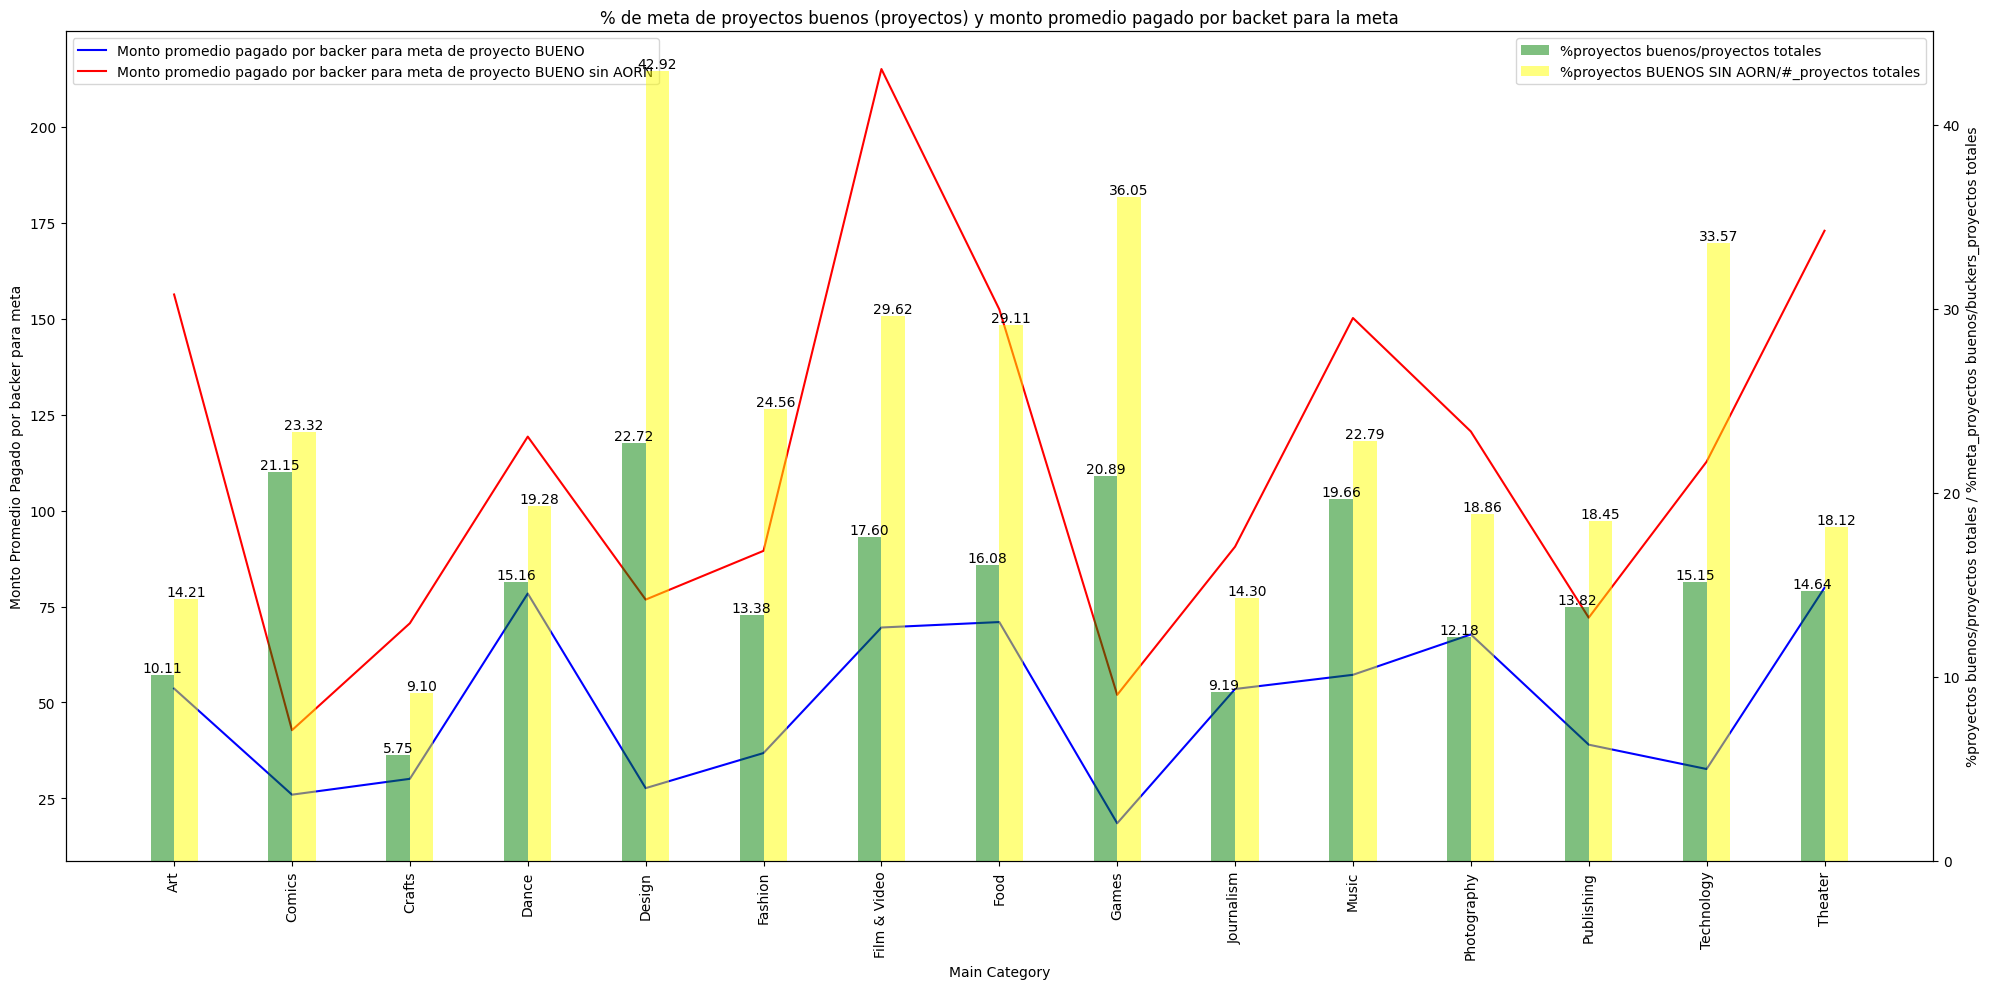

In [469]:
#GRAFICAMOS DOS COSAS:
#BARRAS = El porcentaje que abarca nuestro criterio sobre el total de los proyectos (en # de proyectos) y en segunda instancia nuestro criterio sin el modelo AORN
#LINEAS = Una comparación de cuanto paga cada backer de acuerdo a nuestro criterio y de acuerdo al criterio sin el modelo AORN

fig, ax1 = plt.subplots(figsize=(20, 10))

# Gráficos de línea
ax1.plot(proyectos_merged2['main_category'], proyectos_merged2['monto promedio pagado por bucker proyecto BUENO'], color='blue', label='Monto promedio pagado por backer para meta de proyecto BUENO')
ax1.plot(proyectos_merged2['main_category'], proyectos_merged2['monto promedio pagado por bucker proyecto BUENO SIN AORN'], color='red', label='Monto promedio pagado por backer para meta de proyecto BUENO sin AORN')

# Se crea los gráficos de barra en un eje secundario
ax2 = ax1.twinx()

# Se setea las coordenas para la variable X
X = np.arange(len(proyectos_merged2['main_category']))
w = 0.2

# Gráficos de barras
bar1 = ax2.bar(X - w/2, proyectos_merged2['%(#_proyectos BUENOS/#_proyectos totales'], width=w, alpha=0.5, color='green', label='%proyectos buenos/proyectos totales')
bar2 = ax2.bar(X + w/2, proyectos_merged2['%(#_proyectos BUENOS SIN AORN/#_proyectos totales'], width=w, alpha=0.5, color='yellow', label='%proyectos BUENOS SIN AORN/#_proyectos totales')

# Para añadir los valores a los gráficos de barras
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax2.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Para etiquetas y títulos
ax1.set_xlabel('Main Category')
ax1.set_ylabel('Monto Promedio Pagado por backer para meta')
ax2.set_ylabel('%proyectos buenos/proyectos totales / %meta_proyectos buenos/buckers_proyectos totales')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('% de meta de proyectos buenos (proyectos) y monto promedio pagado por backet para la meta')

# Para poner las etiquetas al eje x
ax1.set_xticks(X)
ax1.set_xticklabels(proyectos_merged2['main_category'], rotation=90)

# Para mostrar el gráfico final
plt.tight_layout()
plt.show()


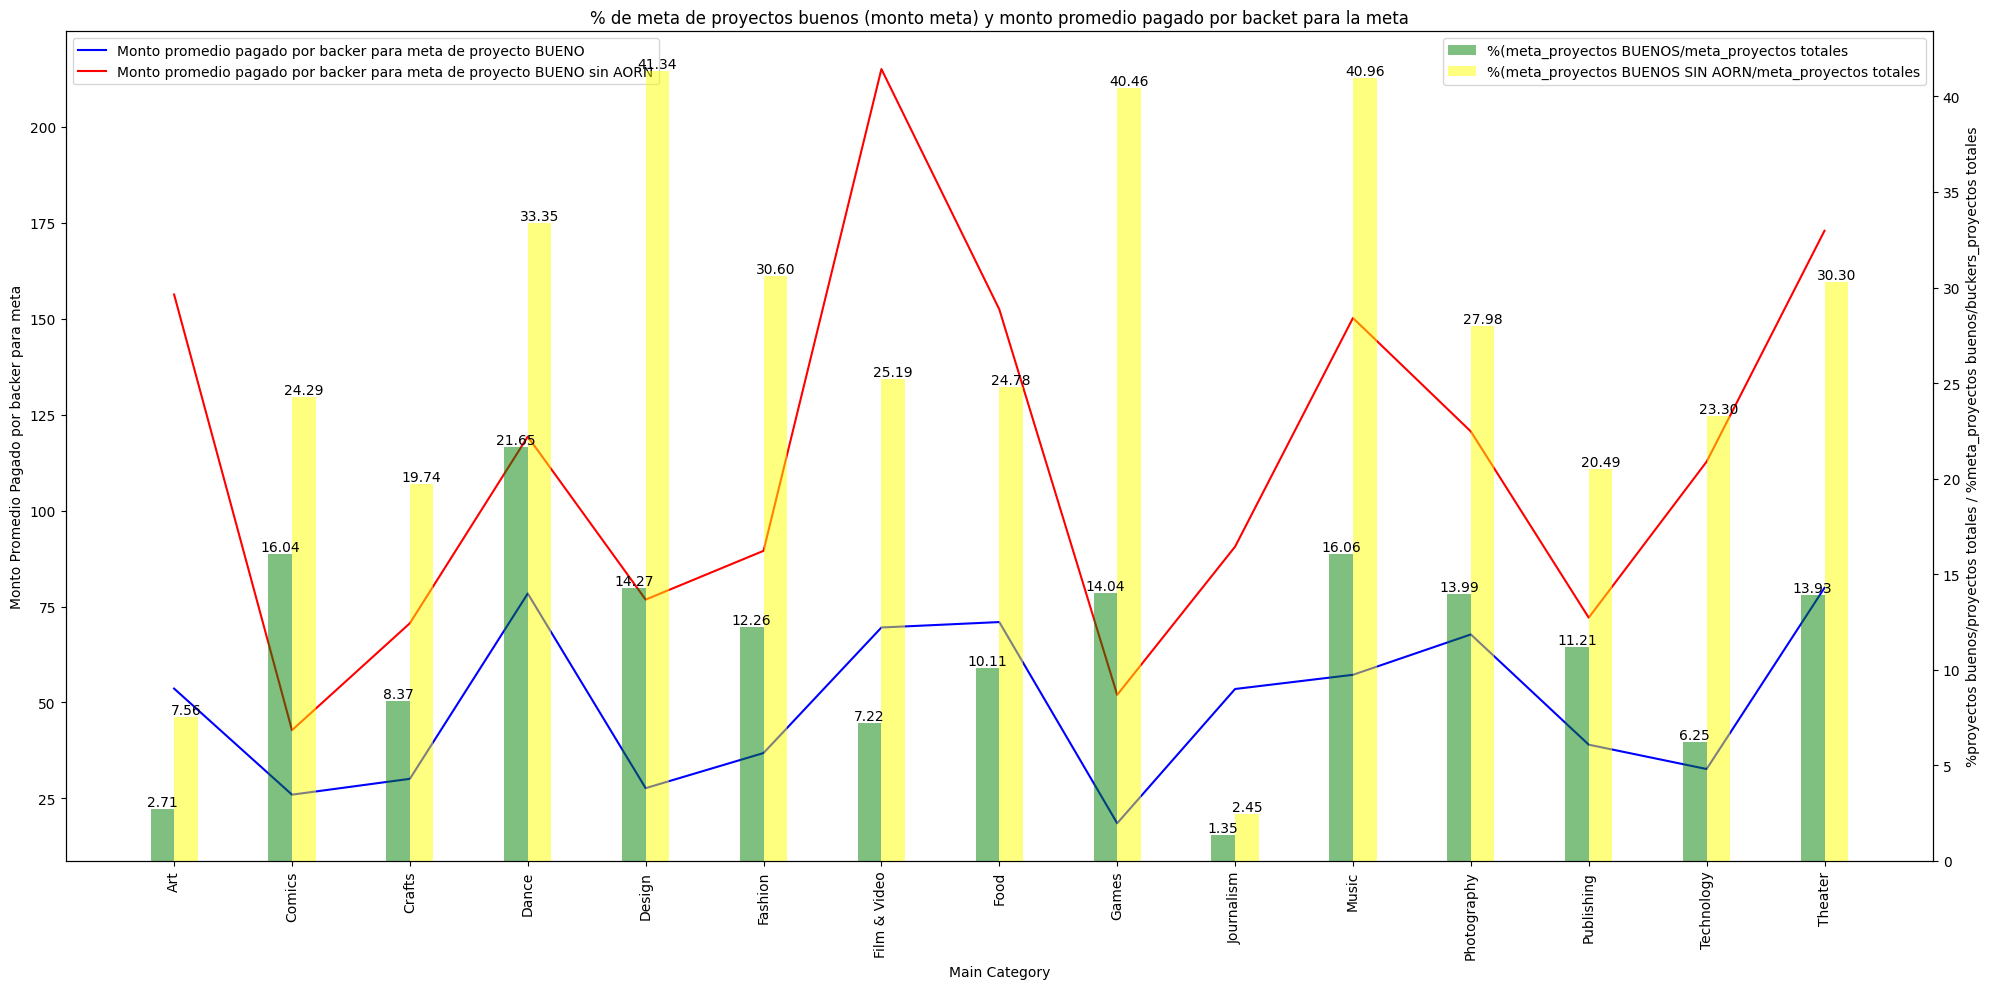

In [470]:
#GRAFICAMOS DOS COSAS:
#BARRAS = El porcentaje que abarca nuestro criterio sobre el total de los proyectos (en MONTO META) y en segunda instancia nuestro criterio sin el modelo AORN
#LINEAS = Una comparación de cuanto paga cada backer de acuerdo a nuestro criterio y de acuerdo al criterio sin el modelo AORN

fig, ax1 = plt.subplots(figsize=(20, 10))

# Gráficos de línea
ax1.plot(proyectos_merged2['main_category'], proyectos_merged2['monto promedio pagado por bucker proyecto BUENO'], color='blue', label='Monto promedio pagado por backer para meta de proyecto BUENO')
ax1.plot(proyectos_merged2['main_category'], proyectos_merged2['monto promedio pagado por bucker proyecto BUENO SIN AORN'], color='red', label='Monto promedio pagado por backer para meta de proyecto BUENO sin AORN')

# Se crea los gráficos de barra en un eje secundario
ax2 = ax1.twinx()

# Se setea las coordenas para la variable X
X = np.arange(len(proyectos_merged2['main_category']))
w = 0.2

# Gráficos de barras
bar1 = ax2.bar(X - w/2, proyectos_merged2['%(meta_proyectos BUENOS/meta_proyectos totales'], width=w, alpha=0.5, color='green', label='%(meta_proyectos BUENOS/meta_proyectos totales')
bar2 = ax2.bar(X + w/2, proyectos_merged2['%(meta_proyectos BUENOS SIN AORN/meta_proyectos totales'], width=w, alpha=0.5, color='yellow', label='%(meta_proyectos BUENOS SIN AORN/meta_proyectos totales')

# Para añadir los valores a los gráficos de barras
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax2.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Para etiquetas y títulos
ax1.set_xlabel('Main Category')
ax1.set_ylabel('Monto Promedio Pagado por backer para meta')
ax2.set_ylabel('%proyectos buenos/proyectos totales / %meta_proyectos buenos/buckers_proyectos totales')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('% de meta de proyectos buenos (monto meta) y monto promedio pagado por backet para la meta')

# Para poner las etiquetas al eje x
ax1.set_xticks(X)
ax1.set_xticklabels(proyectos_merged2['main_category'], rotation=90)

# Para mostrar el gráfico final
plt.tight_layout()
plt.show()